In [1]:
import math
import os
import pandas as pd
import numpy as np

import ast
from ast import literal_eval

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import pickle
import datetime as dt
from collections import Counter
import sys

In [2]:
from ai4dr_utils import *

## Loading pickle file with data and classifications

In [3]:
pkl_infile ='AI4DR_annotated_tox21_luc_biochem_p1_RF.pkl'

In [4]:
curves_df = pd.read_pickle(pkl_infile)

In [5]:
curves_df.columns

Index(['SAMPLE_ID', 'pX01_list', 'pX02_list', 'pX12_list', 'pX_list',
       'pXhalf01_list', 'pXhalf02_list', 'pXhalf12_list', 'pXhalf_list',
       'Y01_list', 'Y02_list', 'Y12_list', 'Y_list', 'Y01_list_notr',
       'Y02_list_notr', 'Y12_list_notr', 'Y_list_notr', 'Yhalf01_list',
       'Yhalf02_list', 'Yhalf12_list', 'Yhalf_list', 'Yhalf01_list_notr',
       'Yhalf02_list_notr', 'Yhalf12_list_notr', 'Yhalf_list_notr',
       'category01', 'probability01', 'category02', 'probability02',
       'category12', 'probability12', 'category', 'probability',
       'categoryhalf', 'probabilityhalf', 'categoryhalf01',
       'probabilityhalf01', 'categoryhalf02', 'probabilityhalf02',
       'categoryhalf12', 'probabilityhalf12', 'ASSAY_OUTCOME', 'CURVE_CLASS2'],
      dtype='object')

In [6]:
curves_df.head()

,SAMPLE_ID,pX01_list,pX02_list,pX12_list,pX_list,pXhalf01_list,pXhalf02_list,pXhalf12_list,pXhalf_list,Y01_list,...,categoryhalf,probabilityhalf,categoryhalf01,probabilityhalf01,categoryhalf02,probabilityhalf02,categoryhalf12,probabilityhalf12,ASSAY_OUTCOME,CURVE_CLASS2
0,NCGC00013058-02,"[[9.133358279439864, 8.783834097714006, 8.4343...","[[9.133358279439864, 8.783834097714006, 8.4343...","[[9.133358279439864, 8.783834097714006, 8.4343...","[[9.133358279439864, 8.783834097714006, 8.4343...","[[9.133358279439864, 8.434388275109749, 7.7354...","[[9.133358279439864, 8.434388275109749, 7.7354...","[[9.133358279439864, 8.434388275109749, 7.7354...","[[9.133358279439864, 8.434388275109749, 7.7354...","[[46.812237964999994, 48.583606364999994, 46.7...",...,P,0.650662,P,0.660056,NO,0.000000,P,0.564821,active antagonist,-2.1
1,NCGC00013082-04,"[[9.133358279439864, 8.783834097714006, 8.4343...","[[9.133358279439864, 8.783834097714006, 8.4343...","[[9.133358279439864, 8.783834097714006, 8.4343...","[[9.133358279439864, 8.783834097714006, 8.4343...","[[9.133358279439864, 8.434388275109749, 7.7354...","[[9.133358279439864, 8.434388275109749, 7.7354...","[[9.133358279439864, 8.434388275109749, 7.7354...","[[9.133358279439864, 8.434388275109749, 7.7354...","[[0.9130774599999998, 1.9847553899999997, 1.75...",...,CNA,0.960885,CNA,0.960885,CNA,0.960595,CNA,0.960698,inactive,4.0
2,NCGC00013095-10,"[[9.133358279439864, 8.783834097714006, 8.4343...","[[9.133358279439864, 8.783834097714006, 8.4343...","[[9.133358279439864, 8.783834097714006, 8.4343...","[[9.133358279439864, 8.783834097714006, 8.4343...","[[9.133358279439864, 8.434388275109749, 7.7354...","[[9.133358279439864, 8.434388275109749, 7.7354...","[[9.133358279439864, 8.434388275109749, 7.7354...","[[9.133358279439864, 8.434388275109749, 7.7354...","[[1.360496725, -0.5589206550000001, 1.85764312...",...,CNA,0.963582,CNA,0.960885,CNA,0.963582,CNA,0.958516,inactive,4.0
3,NCGC00013109-03,"[[9.133358279439864, 8.783834097714006, 8.4343...","[[9.133358279439864, 8.783834097714006, 8.4343...","[[9.133358279439864, 8.783834097714006, 8.4343...","[[9.133358279439864, 8.783834097714006, 8.4343...","[[9.133358279439864, 8.434388275109749, 7.7354...","[[9.133358279439864, 8.434388275109749, 7.7354...","[[9.133358279439864, 8.434388275109749, 7.7354...","[[9.133358279439864, 8.434388275109749, 7.7354...","[[34.06203639, 37.155161410000005, 41.56711209...",...,P,0.671151,B,0.678034,P,0.509172,P,0.686566,active antagonist,-1.1
4,NCGC00013130-04,"[[9.133358279439864, 8.783834097714006, 8.4343...","[[9.133358279439864, 8.783834097714006, 8.4343...","[[9.133358279439864, 8.783834097714006, 8.4343...","[[9.133358279439864, 8.783834097714006, 8.4343...","[[9.133358279439864, 8.434388275109749, 7.7354...","[[9.133358279439864, 8.434388275109749, 7.7354...","[[9.133358279439864, 8.434388275109749, 7.7354...","[[9.133358279439864, 8.434388275109749, 7.7354...","[[-0.29289335499999947, 3.025096295000001, 4.6...",...,CNA,0.967010,CNA,0.967010,CNA,0.960885,CNA,0.966664,inactive,4.0


In [7]:
curves_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9477 entries, 0 to 9476
Data columns (total 43 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SAMPLE_ID          9477 non-null   object 
 1   pX01_list          9477 non-null   object 
 2   pX02_list          9477 non-null   object 
 3   pX12_list          9477 non-null   object 
 4   pX_list            9477 non-null   object 
 5   pXhalf01_list      9477 non-null   object 
 6   pXhalf02_list      9477 non-null   object 
 7   pXhalf12_list      9477 non-null   object 
 8   pXhalf_list        9477 non-null   object 
 9   Y01_list           9477 non-null   object 
 10  Y02_list           9477 non-null   object 
 11  Y12_list           9477 non-null   object 
 12  Y_list             9477 non-null   object 
 13  Y01_list_notr      9477 non-null   object 
 14  Y02_list_notr      9477 non-null   object 
 15  Y12_list_notr      9477 non-null   object 
 16  Y_list_notr        9477 

# A few simple analyses : 
- most curves are predicted with a probability higher than 0.9
- most of these low probability predictions correspond to other classifications than 'Clearly Non-Active'
- the number of samples classified in different categories is counted.

In [8]:
curves_df.query("probability < 0.9").shape

(1896, 43)

In [9]:
curves_df.query("category != 'CNA' and category != 'XX' and probability < 0.9").shape

(997, 43)

In [10]:
curves_df.query("category != 'CNA'").shape

(1528, 43)

In [11]:
Counter(curves_df['category'])

Counter({'NO': 248,
         'CNA': 7949,
         'P': 540,
         'CASIG': 137,
         'XX': 338,
         'B': 239,
         'CAHS': 11,
         'LS': 4,
         'CANT': 7,
         'W': 2,
         'CANB': 2})

In [12]:
curves_notcna_df = curves_df.query("category != 'CNA' ")

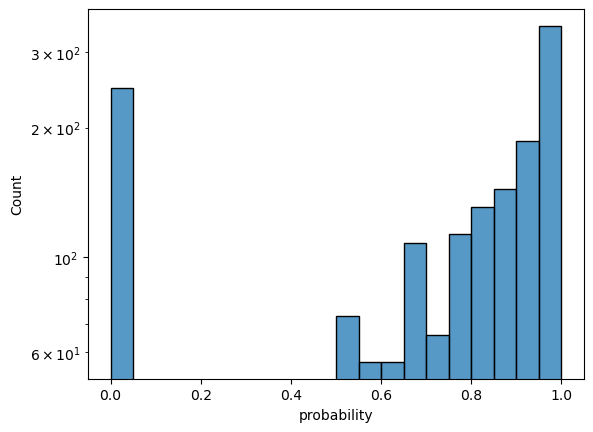

In [13]:
ax = sns.histplot(x = "probability", data = curves_notcna_df, binwidth=0.05 )
ax.set_yscale("log")


In [14]:
pd.crosstab(curves_df.category, curves_df.ASSAY_OUTCOME)

ASSAY_OUTCOME,active agonist,active antagonist,inactive,inconclusive,inconclusive agonist,inconclusive antagonist
category,,,,,,
B,0,169,12,1,0,57
CAHS,0,10,0,0,0,1
CANB,0,2,0,0,0,0
CANT,0,7,0,0,0,0
CASIG,0,137,0,0,0,0
CNA,1,30,7619,0,5,294
LS,0,4,0,0,0,0
NO,0,181,3,0,0,64
P,0,511,0,0,0,29


In [15]:
pd.crosstab(curves_df.ASSAY_OUTCOME, curves_df.CURVE_CLASS2)

CURVE_CLASS2,-3.0,-2.4,-2.3,-2.2,-2.1,-1.4,-1.3,-1.2,-1.1,2.2,2.4,3.0,4.0
ASSAY_OUTCOME,,,,,,,,,,,,,
active agonist,0,0,0,0,0,0,0,0,0,1,0,0,0
active antagonist,70,25,1,149,480,4,1,36,280,0,0,0,7
inactive,30,39,0,0,0,0,0,0,0,0,2,3,7898
inconclusive,1,0,0,0,0,0,0,0,0,0,0,0,0
inconclusive agonist,0,0,0,0,0,0,0,0,0,1,1,0,3
inconclusive antagonist,50,35,1,92,38,0,0,15,3,0,0,0,211


In [16]:
pd.crosstab(curves_df.category, curves_df.CURVE_CLASS2)

CURVE_CLASS2,-3.0,-2.4,-2.3,-2.2,-2.1,-1.4,-1.3,-1.2,-1.1,2.2,2.4,3.0,4.0
category,,,,,,,,,,,,,
B,52,4,1,41,94,1,1,7,4,0,0,0,34
CAHS,1,0,0,0,4,0,0,0,6,0,0,0,0
CANB,0,0,0,0,1,0,0,0,1,0,0,0,0
CANT,0,0,0,0,0,0,0,0,7,0,0,0,0
CASIG,0,0,0,0,17,0,0,0,120,0,0,0,0
CNA,57,84,0,70,10,2,0,11,1,2,3,3,7706
LS,0,0,0,0,3,0,0,0,1,0,0,0,0
NO,22,9,0,83,66,1,0,13,26,0,0,0,28
P,19,2,1,47,323,0,0,20,115,0,0,0,13


# RF model categories determined on all three replica and on replica 1 and 2 are compared
In such a way that the rows and columns are ordered the same for easier comparison

In [17]:
crosstab_df = pd.crosstab(curves_df.category12, curves_df.category)

In [18]:
all_categories = list(set(list(crosstab_df.columns) + list(crosstab_df.index)))
clean_crosstab_df = pd.DataFrame(columns=all_categories, index= all_categories).fillna(value=0)
clean_crosstab_df.index.name = crosstab_df.index.name
clean_crosstab_df.columns.name = crosstab_df.columns.name
clean_crosstab_df = clean_crosstab_df + crosstab_df
clean_crosstab_df = clean_crosstab_df.fillna(value=0).astype('int32')

In [19]:
clean_crosstab_df

category,B,CAHS,CANB,CANT,CASIG,CNA,LS,NO,P,W,XX
category12,,,,,,,,,,,
B,140,2,0,0,1,25,0,47,54,0,0
CAHS,1,9,0,0,1,0,0,3,0,0,0
CANB,0,0,2,0,0,0,0,0,0,0,0
CANT,0,0,0,7,0,0,0,0,0,0,0
CASIG,1,0,0,0,122,0,0,5,2,0,0
CNA,19,0,0,0,0,7632,0,42,7,0,264
LS,0,0,0,0,0,0,2,0,0,0,0
NO,32,0,0,0,12,31,0,114,55,0,0
P,45,0,0,0,1,3,2,36,421,0,0


Same for the classification of DR curves using all concentrations and using half of the concentrations

In [20]:
crosstab_full_vs_half_df = pd.crosstab(curves_df.category12, curves_df.categoryhalf12)

In [21]:
all_categories = list(set(list(crosstab_full_vs_half_df.columns) + list(crosstab_full_vs_half_df.index)))
clean_crosstab_full_vs_half_df = pd.DataFrame(columns=all_categories, index= all_categories).fillna(value=0)
clean_crosstab_full_vs_half_df.index.name = crosstab_full_vs_half_df.index.name
clean_crosstab_full_vs_half_df.columns.name = crosstab_full_vs_half_df.columns.name
clean_crosstab_full_vs_half_df = clean_crosstab_full_vs_half_df + crosstab_full_vs_half_df
clean_crosstab_full_vs_half_df = clean_crosstab_full_vs_half_df.fillna(value=0).astype('int32')


In [22]:
crosstab_full_vs_half_df

categoryhalf12,B,CAHS,CANB,CANT,CASIG,CNA,LS,NO,P,W,XX
category12,,,,,,,,,,,
B,49,4,0,0,2,7,0,66,141,0,0
CAHS,1,11,0,0,1,0,0,1,0,0,0
CANB,0,0,1,0,0,0,0,1,0,0,0
CANT,0,0,0,7,0,0,0,0,0,0,0
CASIG,1,0,0,0,125,0,0,4,0,0,0
CNA,1,0,0,0,0,7630,0,128,0,0,205
LS,0,0,0,0,0,0,2,0,0,0,0
NO,9,3,0,1,9,3,0,149,70,0,0
P,11,0,0,0,0,0,0,17,480,0,0


Comparison between the AI4DR categories determined on all concentrations and all replica with the Tox21 assay outcome

# Samples selection and curves images saving
From now on, different selections are performed, some curves are displayed for inspection, and saved.

In [23]:
columns_subset = ['SAMPLE_ID', 'pX_list', 'Y_list', 'Y_list_notr', 'pX12_list', 'Y12_list', 'Y12_list_notr', 'category', 'probability', 'ASSAY_OUTCOME']

In [24]:
curr_curves_df = curves_df.query("(ASSAY_OUTCOME == 'active agonist' or ASSAY_OUTCOME == 'inconclusive' or ASSAY_OUTCOME == 'inconclusive agonist')  and category == 'CNA' ").sort_values(by='probability', ascending=False)[columns_subset]

In [25]:
curr_curves_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 250 to 2716
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SAMPLE_ID      6 non-null      object 
 1   pX_list        6 non-null      object 
 2   Y_list         6 non-null      object 
 3   Y_list_notr    6 non-null      object 
 4   pX12_list      6 non-null      object 
 5   Y12_list       6 non-null      object 
 6   Y12_list_notr  6 non-null      object 
 7   category       6 non-null      object 
 8   probability    6 non-null      float64
 9   ASSAY_OUTCOME  6 non-null      object 
dtypes: float64(1), object(9)
memory usage: 528.0+ bytes


Dataframe size : 6 showing the 7 first entries


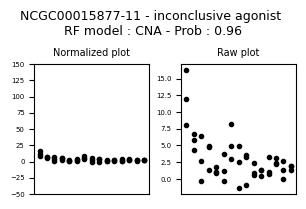

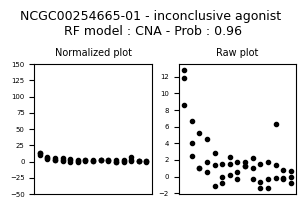

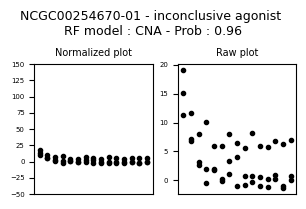

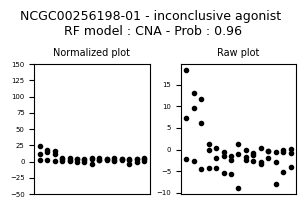

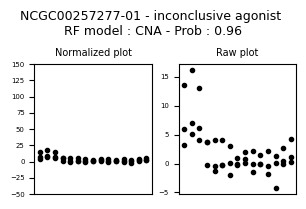

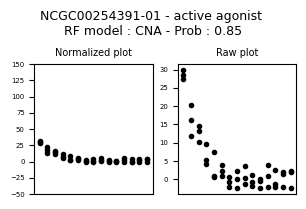

In [26]:
summarize_viz_triplicate_selection_RF(curr_curves_df,size=7)

Dataframe size : 6 showing the 7 first entries


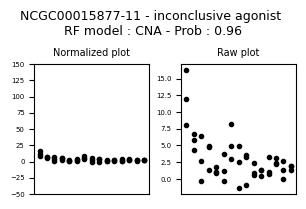

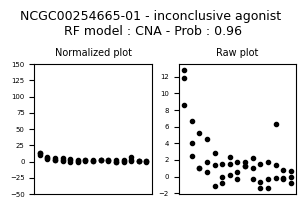

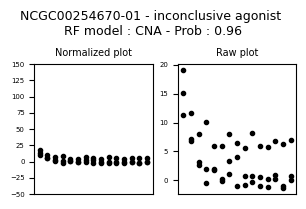

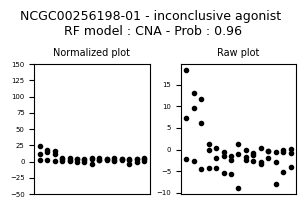

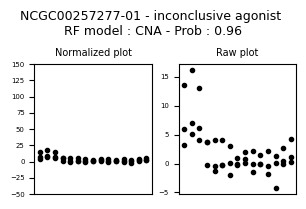

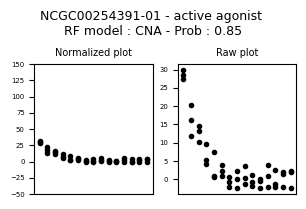

In [27]:
summarize_save_triplicate_selection_RF(curr_curves_df,'inconclusive_CNA_RF/',size=7)

In [28]:
curr_curves_df = curves_df.query("ASSAY_OUTCOME == 'inconclusive antagonist'  and category == 'P' ").sort_values(by='probability', ascending=False)[columns_subset]

Dataframe size : 29 showing the 3 first entries


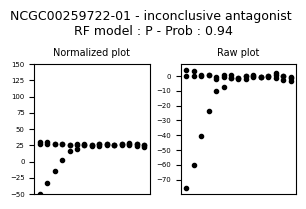

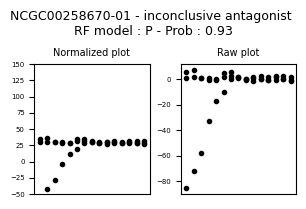

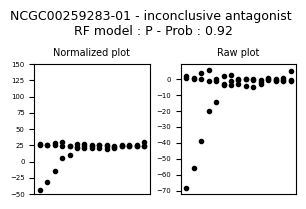

In [29]:
summarize_save_triplicate_selection_RF(curr_curves_df,'inconclusive_antagos_RF/',size=3)

In [30]:
curr_curves_df = curves_df.query("ASSAY_OUTCOME == 'inconclusive antagonist'  and category == 'W' ").sort_values(by='probability', ascending=False)[columns_subset]

In [31]:
summarize_save_triplicate_selection_RF(curr_curves_df,'inconclusive_antagos/',size=3)

Dataframe size : 0 showing the 3 first entries


In [32]:
curr_curves_df = curves_df.query("ASSAY_OUTCOME == 'inactive'  and category == 'W' ").sort_values(by='probability', ascending=True)[columns_subset]

In [33]:
summarize_save_triplicate_selection_RF(curr_curves_df,'inactives/',size=3)

Dataframe size : 0 showing the 3 first entries


In [34]:
curr_curves_df = curves_df.query("ASSAY_OUTCOME == 'inactive'  and category == 'CNA' ").sort_values(by='probability', ascending=True)[columns_subset]

Dataframe size : 7619 showing the 3 first entries


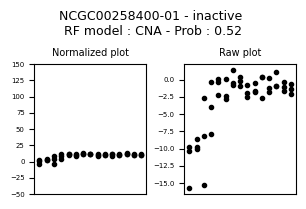

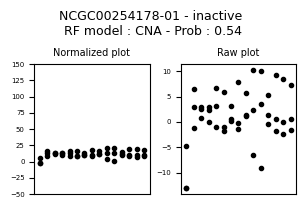

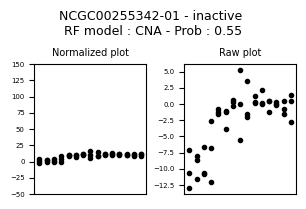

In [35]:
summarize_save_triplicate_selection_RF(curr_curves_df,'inactives_RF/',size=3)

In [36]:
curr_curves_df = curves_df.query("ASSAY_OUTCOME == 'inactive'  and category == 'CNA' ").sort_values(by='probability', ascending=False)[columns_subset]

Dataframe size : 7619 showing the 3 first entries


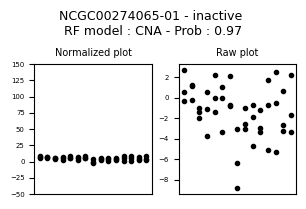

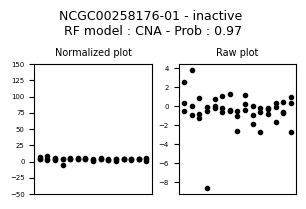

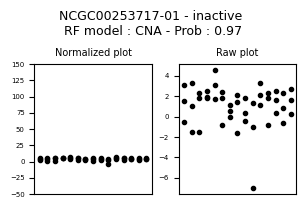

In [37]:
summarize_save_triplicate_selection_RF(curr_curves_df,'inactives_RF/',size=3)

In [38]:
curr_curves_df = curves_df.query("ASSAY_OUTCOME == 'active antagonist'  and category == 'CNA' ").sort_values(by='probability', ascending=False)[columns_subset]

Dataframe size : 30 showing the 3 first entries


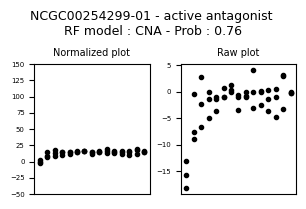

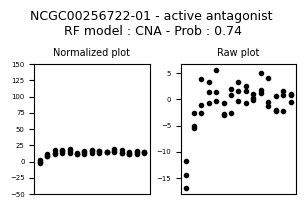

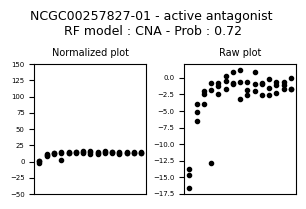

In [39]:
summarize_save_triplicate_selection_RF(curr_curves_df,'active_antago_CNA_RF/',size=3)

In [40]:
curr_curves_df = curves_df.query("ASSAY_OUTCOME == 'active antagonist'  and category == 'CNA' ").sort_values(by='probability', ascending=True)[columns_subset]

Dataframe size : 30 showing the 3 first entries


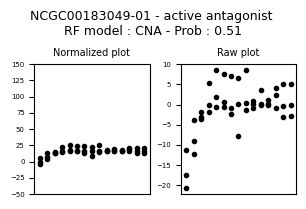

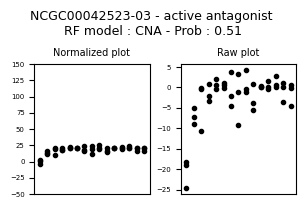

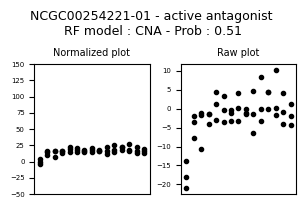

In [41]:
summarize_save_triplicate_selection_RF(curr_curves_df,'active_antago_CNA_RF/',size=3)

In [42]:
curr_curves_df = curves_df.query("ASSAY_OUTCOME == 'active antagonist'  and category == 'P' ").sort_values(by='probability', ascending=False)[columns_subset]

Dataframe size : 511 showing the 3 first entries


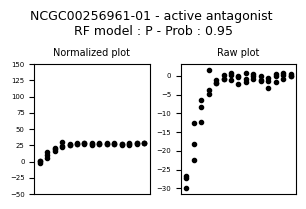

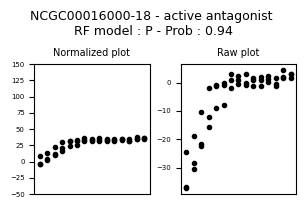

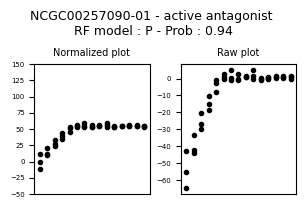

In [43]:
summarize_save_triplicate_selection_RF(curr_curves_df,'active_antago_P_RF/',size=3)

In [44]:
curr_curves_df = curves_df.query("ASSAY_OUTCOME == 'active antagonist'  and category == 'P' ").sort_values(by='probability', ascending=True)[columns_subset]

Dataframe size : 511 showing the 3 first entries


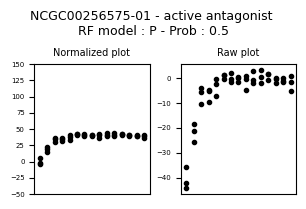

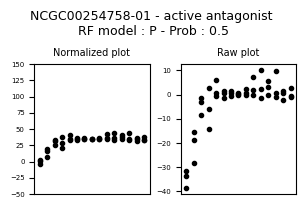

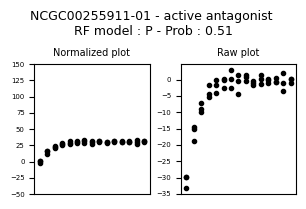

In [45]:
summarize_save_triplicate_selection_RF(curr_curves_df,'active_antago_P_RF/',size=3)

In [46]:
curr_curves_df = curves_df.query("ASSAY_OUTCOME == 'active antagonist'  and category == 'W' ").sort_values(by='probability', ascending=False)[columns_subset]

Dataframe size : 2 showing the 2 first entries


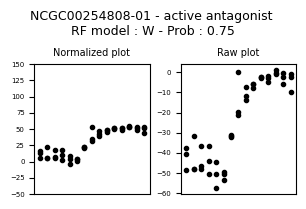

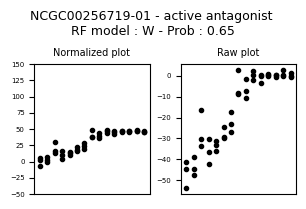

In [47]:
summarize_viz_triplicate_selection_RF(curr_curves_df,size=2)

Dataframe size : 2 showing the 2 first entries


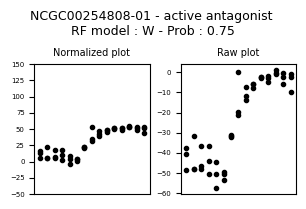

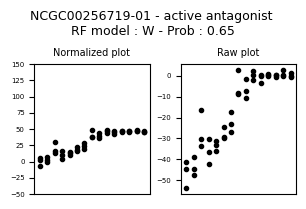

In [48]:
summarize_save_triplicate_selection_RF(curr_curves_df,'active_antago_P_RF/',size=2)

In [49]:
curr_curves_df = curves_df.query("ASSAY_OUTCOME == 'active antagonist'  and category == 'LS' ").sort_values(by='probability', ascending=True)[columns_subset]

Dataframe size : 4 showing the 4 first entries


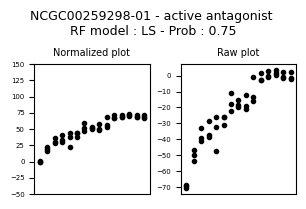

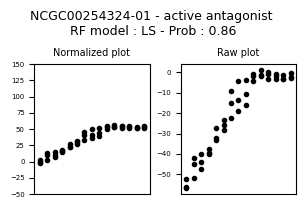

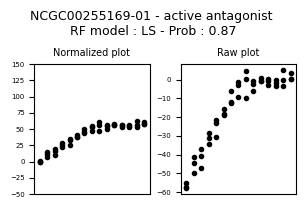

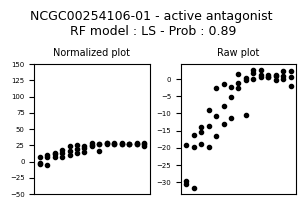

In [50]:
summarize_save_triplicate_selection_RF(curr_curves_df,'active_antago_P_RF/',size=4)

In [51]:
# CASIG curves : clearly actives, sigmoidal shape
curr_curves_df = curves_df.query("category == 'CASIG'").sort_values(by='probability', ascending=True)[columns_subset]

Dataframe size : 137 showing the 2 first entries


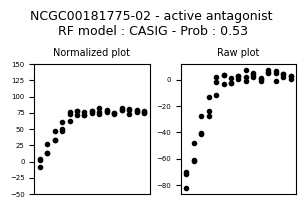

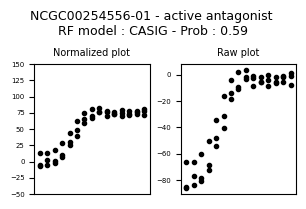

In [52]:
summarize_save_triplicate_selection_RF(curr_curves_df,'active_antago_CAXX_RF/',size=2)

In [53]:
curr_curves_df = curves_df.query("category == 'CANB'").sort_values(by='probability', ascending=True)[columns_subset]

Dataframe size : 2 showing the 2 first entries


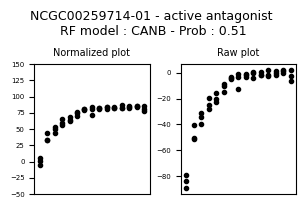

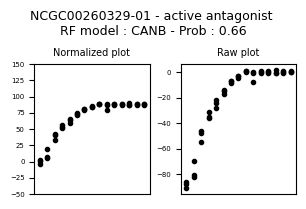

In [54]:
summarize_save_triplicate_selection_RF(curr_curves_df,'active_antago_CAXX_RF/',size=2)

In [55]:
# CAHS curves : clearly actives, high slope
curr_curves_df = curves_df.query("category == 'CAHS'").sort_values(by='probability', ascending=True)[columns_subset]

Dataframe size : 11 showing the 2 first entries


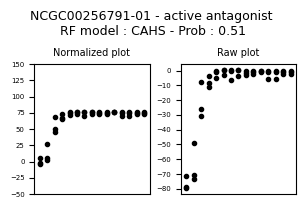

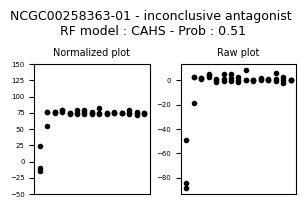

In [56]:
summarize_save_triplicate_selection_RF(curr_curves_df,'active_antago_CAXX_RF/',size=2)

In [57]:
# The RF model do not classify these DRC in one of the predefined categories 
curr_curves_df = curves_df.query("category == 'NO'")[columns_subset]

Dataframe size : 248 showing the 10 first entries


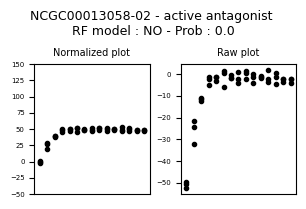

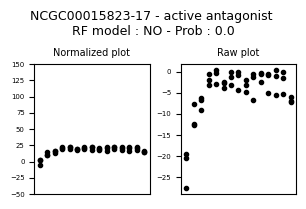

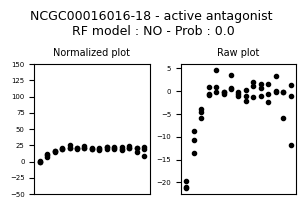

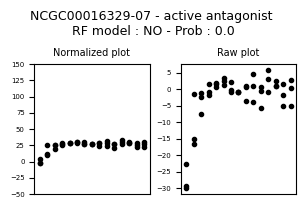

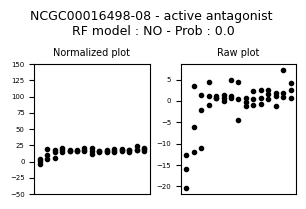

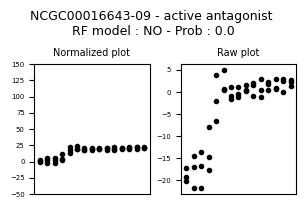

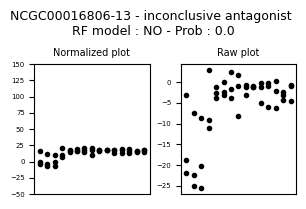

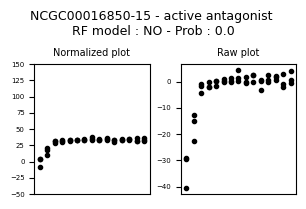

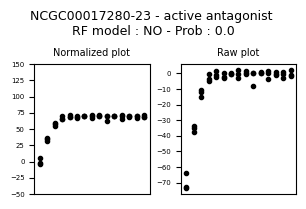

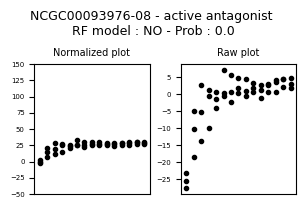

In [58]:
summarize_viz_triplicate_selection_RF(curr_curves_df,size=10)

In [59]:
out_questionable_ids = 'tox21_ids_not_classified_by_RF.txt'

In [60]:
curr_curves_df[['SAMPLE_ID']].to_csv(out_questionable_ids,index=None)

In [62]:
curr_curves_df = curves_df.query("category == 'XX'")[columns_subset]

Dataframe size : 338 showing the 30 first entries


/common/workdir/221215/IDD-Papers-AI4DR/ai4dr_utils.py:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, (ax1, ax2) = plt.subplots(1, 2,figsize = (3.,2.0))                 #on charge une figure dans laquelle il y aura le graphique, de taille 1.5*1.5 en p50 en pixels


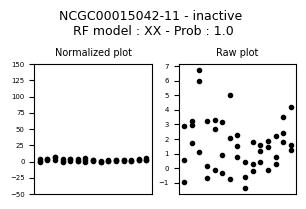

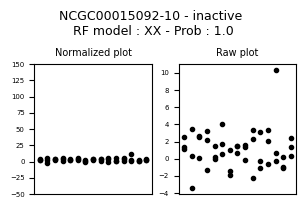

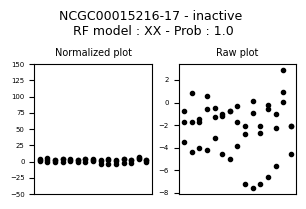

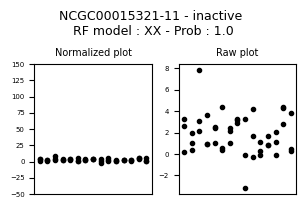

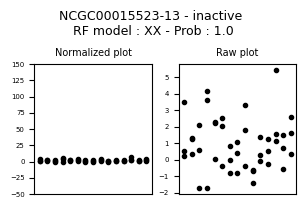

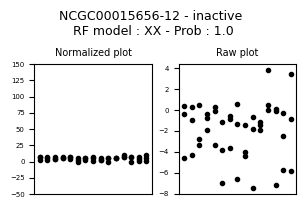

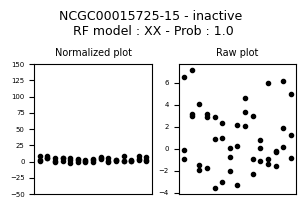

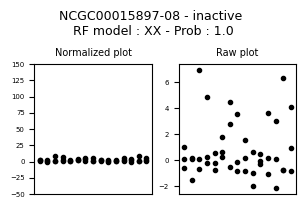

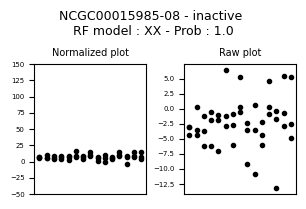

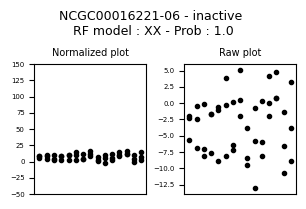

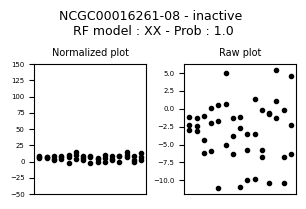

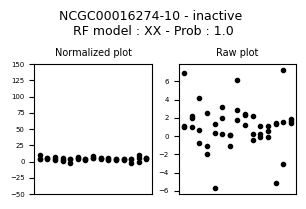

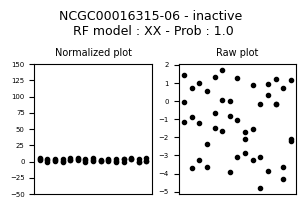

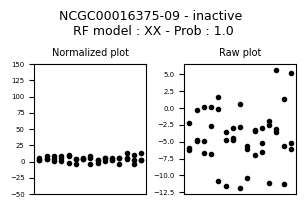

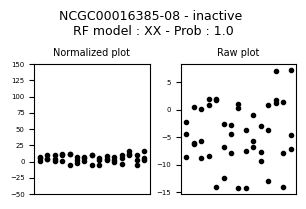

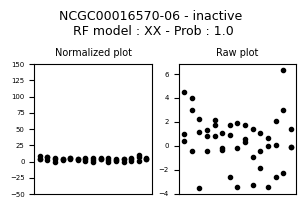

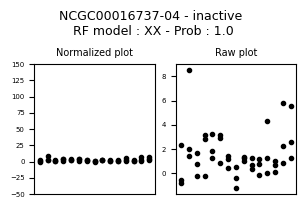

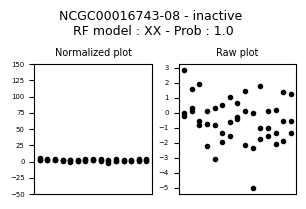

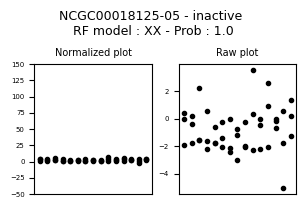

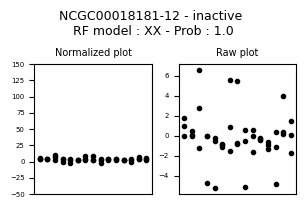

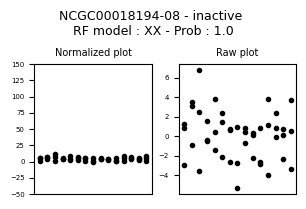

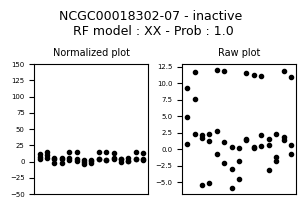

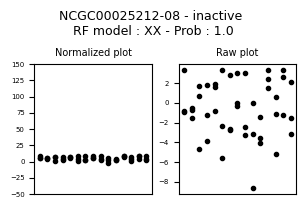

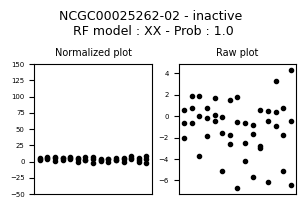

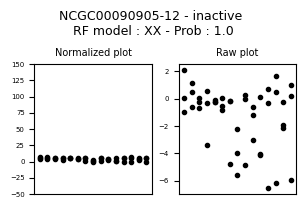

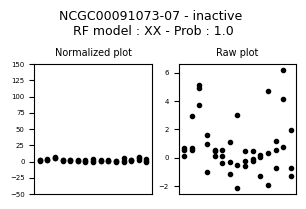

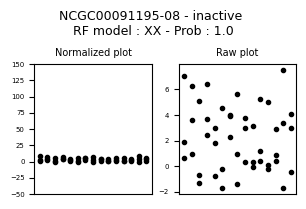

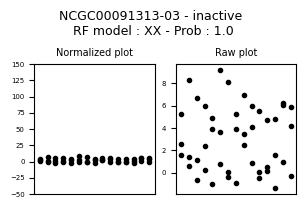

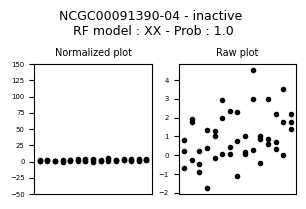

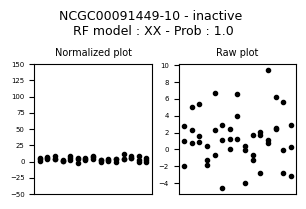

In [64]:
summarize_viz_triplicate_selection_RF(curr_curves_df,size=30)